In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping


Using Theano backend.
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "/Users/paragtaneja/anaconda2/lib/python2.7/site-packages/theano/gpuarray/__init__.py", line 164, in <module>
    use(config.device)
  File "/Users/paragtaneja/anaconda2/lib/python2.7/site-packages/theano/gpuarray/__init__.py", line 151, in use
    init_dev(device)
  File "/Users/paragtaneja/anaconda2/lib/python2.7/site-packages/theano/gpuarray/__init__.py", line 60, in init_dev
    sched=config.gpuarray.sched)
  File "pygpu/gpuarray.pyx", line 634, in pygpu.gpuarray.init
  File "pygpu/gpuarray.pyx", line 584, in pygpu.gpuarray.pygpu_init
  File "pygpu/gpuarray.pyx", line 1057, in pygpu.gpuarray.GpuContext.__cinit__
GpuArrayException: cuInit: (null): (null)


In [2]:
img_width, img_height = 256, 256
train_data_dir = "/Users/paragtaneja/AnacondaProjects/Sketch/Train1"
validation_data_dir = "/Users/paragtaneja/AnacondaProjects/Sketch/Test1"
nb_train_samples = 2062
nb_validation_samples = 466 
batch_size = 16
epochs = 150


In [3]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

In [4]:
for layer in model.layers[:5]:
    layer.trainable = False


In [5]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(3, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)
model_final.summary()

/Users/paragtaneja/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Softmax.0, inputs=/input_1)`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [6]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])


In [7]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

In [8]:
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 240 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


In [9]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')



In [10]:
history = model_final.fit_generator(
train_generator,
steps_per_epoch=2000//1000,
#samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
#nb_val_samples = nb_validation_samples,
validation_steps=800//400,
callbacks = [checkpoint, early])
model_final.save_weights('categorical1.h5')

print(history.history)

Epoch 1/150
2/2 [==============================] - 75s 38s/step - loss: 1.2569 - acc: 0.3438 - val_loss: 1.1650 - val_acc: 0.2969
Epoch 2/150
2/2 [==============================] - 75s 37s/step - loss: 1.1474 - acc: 0.3438 - val_loss: 1.1101 - val_acc: 0.3125
Epoch 3/150
2/2 [==============================] - 74s 37s/step - loss: 1.2187 - acc: 0.2500 - val_loss: 1.0807 - val_acc: 0.5000
Epoch 4/150
2/2 [==============================] - 73s 36s/step - loss: 1.2276 - acc: 0.2500 - val_loss: 1.0882 - val_acc: 0.4688
Epoch 5/150
2/2 [==============================] - 74s 37s/step - loss: 1.0771 - acc: 0.4062 - val_loss: 1.0922 - val_acc: 0.3906
Epoch 6/150
2/2 [==============================] - 73s 37s/step - loss: 1.1977 - acc: 0.3125 - val_loss: 1.0655 - val_acc: 0.4219
Epoch 7/150
2/2 [==============================] - 73s 36s/step - loss: 1.1901 - acc: 0.2812 - val_loss: 1.0810 - val_acc: 0.3906
Epoch 8/150
2/2 [==============================] - 73s 37s/step - loss: 1.1301 - acc: 0.28

2/2 [==============================] - 73s 36s/step - loss: 0.6359 - acc: 0.7188 - val_loss: 0.3456 - val_acc: 0.8594
Epoch 66/150
2/2 [==============================] - 73s 36s/step - loss: 0.4502 - acc: 0.8125 - val_loss: 0.3601 - val_acc: 0.8438
Epoch 67/150
2/2 [==============================] - 72s 36s/step - loss: 0.4027 - acc: 0.8750 - val_loss: 0.3445 - val_acc: 0.8594
Epoch 68/150
2/2 [==============================] - 73s 36s/step - loss: 0.4676 - acc: 0.7812 - val_loss: 0.2196 - val_acc: 0.9219
Epoch 69/150
2/2 [==============================] - 73s 37s/step - loss: 0.4963 - acc: 0.7500 - val_loss: 0.2261 - val_acc: 0.9219
Epoch 70/150
2/2 [==============================] - 72s 36s/step - loss: 0.2778 - acc: 0.9062 - val_loss: 0.2851 - val_acc: 0.9375
Epoch 71/150
2/2 [==============================] - 73s 37s/step - loss: 0.3879 - acc: 0.8438 - val_loss: 0.1893 - val_acc: 0.9688
Epoch 72/150
2/2 [==============================] - 73s 36s/step - loss: 0.3836 - acc: 0.9062 - 

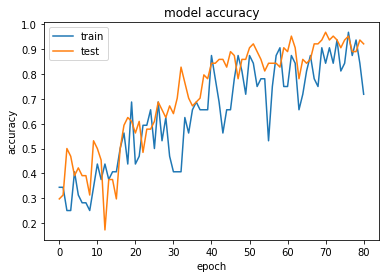

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

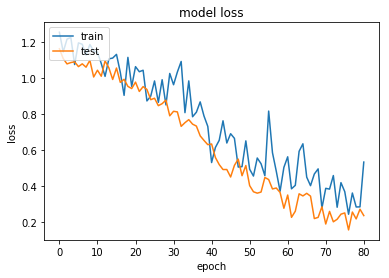

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
from google import google
def GoogleSearch (str,num_page):
    
#limiting the number of results
#num_page = 1 
#the RESULT is the result obtained from the classifier
    search_results = google.search( str+'videos for kids', num_page) # insert the query required
#gets us data from the list of objects
    data = [o.name for o in search_results] 
    link = [o.link for o in search_results] 
    data.pop(0)
#provides us with the information of number of elements in the list
    length = len(data)
    print 'Following are the Relevant links were more information can be obtained - \n\n'
#loop to get all the output in a organised manner
    for x in xrange(length):
        print data[x]+'\n'+link[x]
    return;
RESULT = outputclassname
GoogleSearch (RESULT,3)

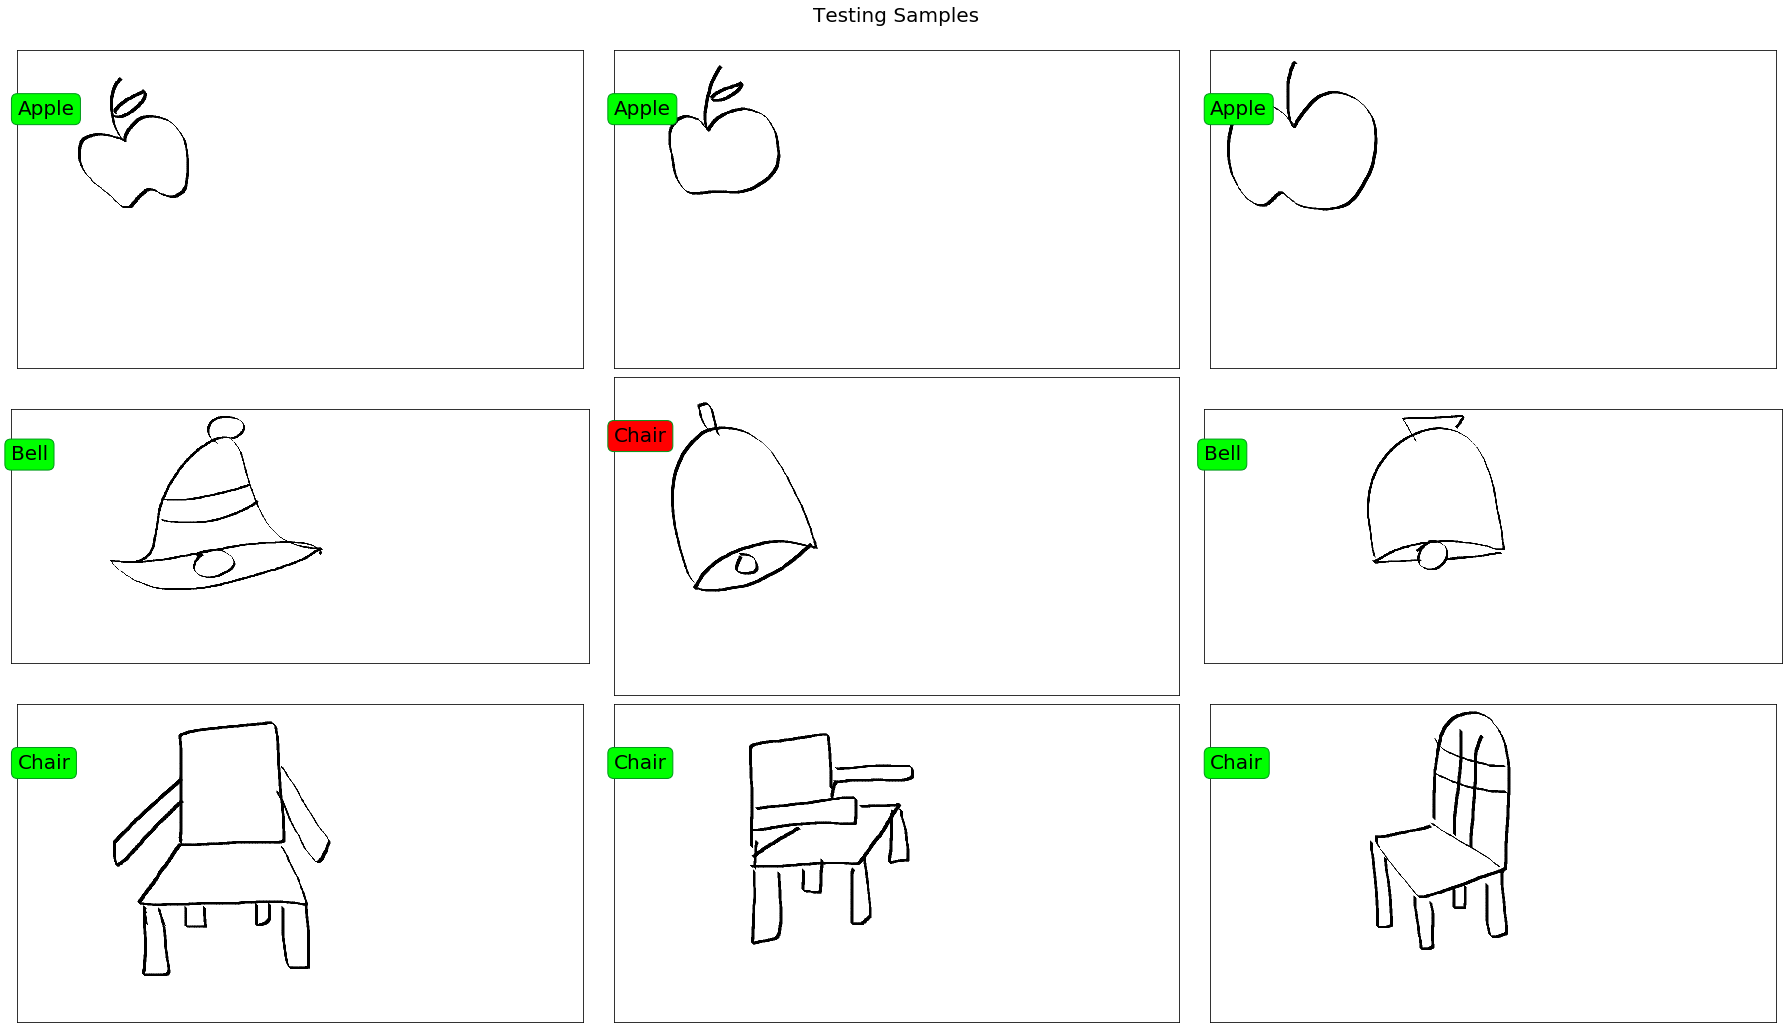

In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy.misc import imresize
%matplotlib inline
import os
import matplotlib.image as img
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
import numpy as np
from collections import defaultdict
root_dir = '/Users/paragtaneja/AnacondaProjects/Sketch/Testing/'
rows = 3
cols = 3
rand_img = ""
plt.close('all')
fig, ax = plt.subplots(rows, cols, frameon=True, figsize=(25, 15),squeeze=False)
fig.suptitle('Testing Samples', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
test_model = load_model('/Users/paragtaneja/AnacondaProjects/Sketch/vgg16_1.h5')
for i in range(rows):
    for j in range(cols):
        try:
            #food_dir = sorted_food_dirs[i*cols + j]
            food_dir = sorted_food_dirs[i] 
        except:
            break
        all_files = os.listdir(os.path.join(root_dir, food_dir))
        #rand_img = np.random.choice(all_files[j])
        rand_img = all_files[j]
        img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (1, 0, 0)
        img1 = load_img(os.path.join(root_dir, food_dir, rand_img),False,target_size=(img_width,img_height))
        x = img_to_array(img1)
        x = np.expand_dims(x, axis=0)
        out = test_model.predict(x)
        outputclass, = np.where(out[0]==out[0].max())
        if outputclass == 0:
            outputclassname = "Apple"
        elif outputclass == 1:
            outputclassname = "Bell"
        else:
            outputclassname = "Chair"
            
        if outputclassname == food_dir:
            fc = (0, 1, 0)
        
        ax[i][j].text(0, 100,outputclassname, size=20, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.tight_layout(h_pad = 1.0,pad=0.4,w_pad=0.5)



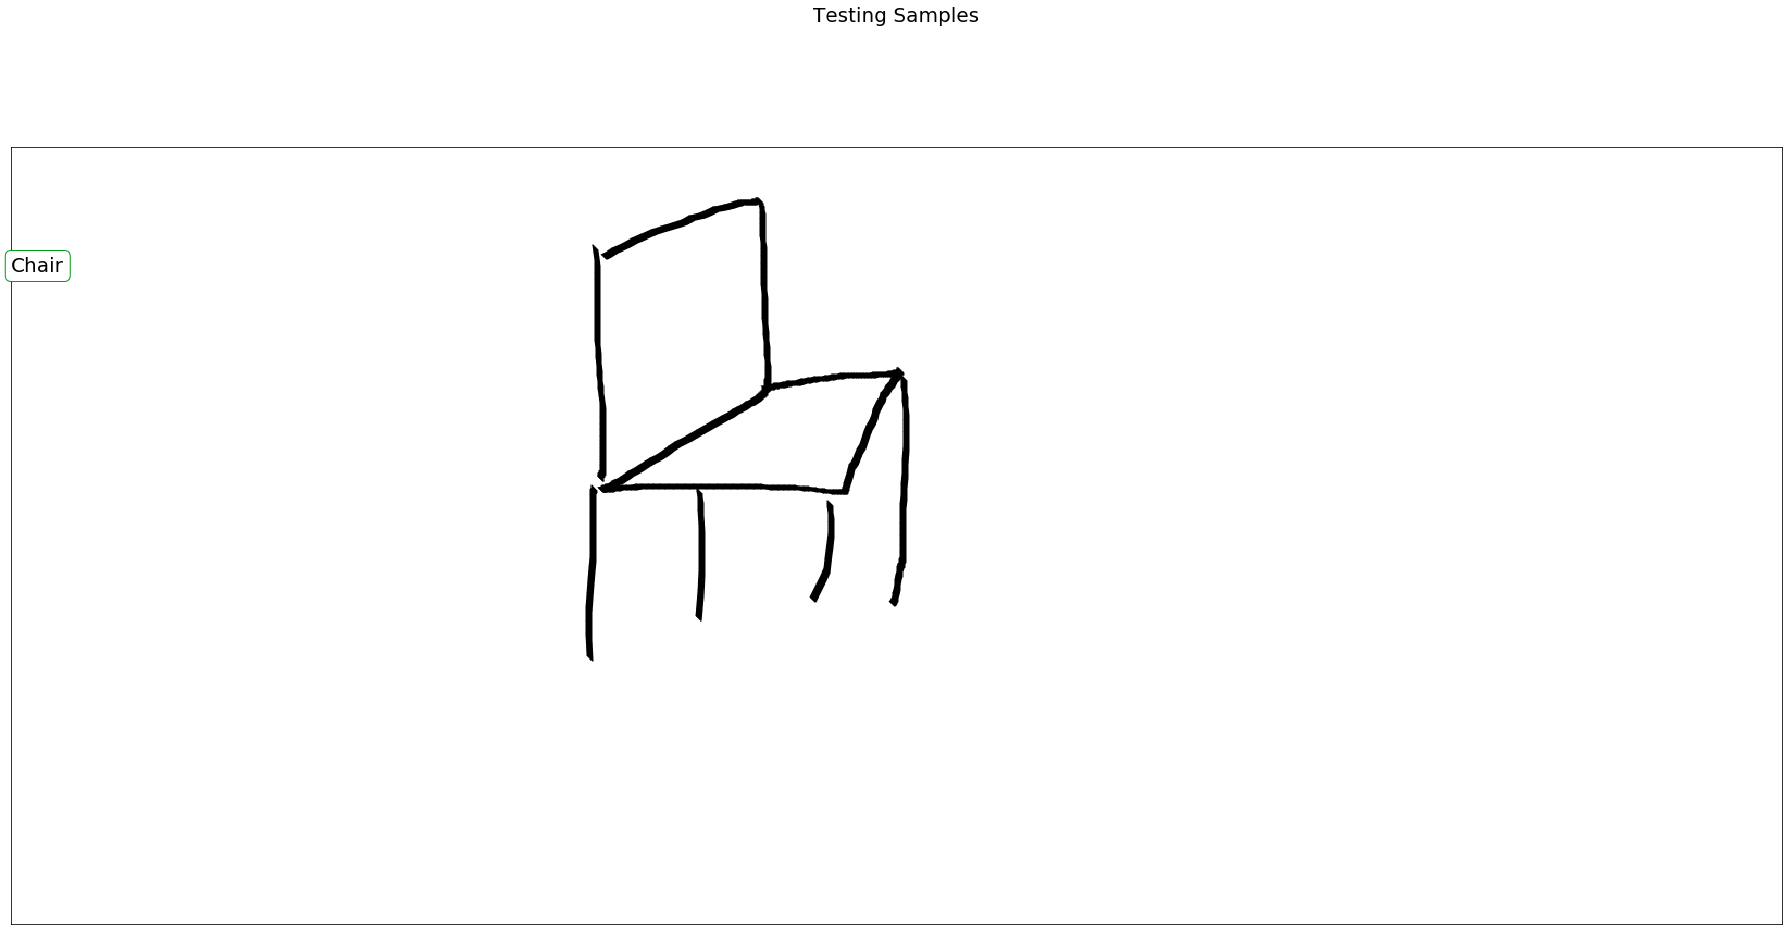

In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy.misc import imresize

%matplotlib inline
import os
import matplotlib.image as img
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
import numpy as np
from collections import defaultdict
root_dir = '/Users/paragtaneja/AnacondaProjects/Sketch/Demo/'
rows = 1
cols = 1
rand_img = ""
plt.close('all')
fig, ax = plt.subplots(rows, cols, frameon=True, figsize=(25, 15),squeeze=False)
fig.suptitle('Testing Samples', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))

test_model = load_model('/Users/paragtaneja/AnacondaProjects/Sketch/vgg16_1.h5')

for i in range(rows):
    for j in range(cols):
        try:
            #food_dir = sorted_food_dirs[i*cols + j]
            food_dir = sorted_food_dirs[i] 
        except:
            break
        all_files = os.listdir(os.path.join(root_dir, food_dir))
        #rand_img = np.random.choice(all_files[j])
        rand_img = all_files[j]
        img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (1, 1, 1)
        img1 = load_img(os.path.join(root_dir, food_dir, rand_img),False,target_size=(img_width,img_height))
        x = img_to_array(img1)
        x = np.expand_dims(x, axis=0)
        out = test_model.predict(x)
        outputclass, = np.where(out[0]==out[0].max())
        
        if outputclass == 0:
            outputclassname = "Apple"
        elif outputclass == 1:
            outputclassname = "Bell"
        else:
            outputclassname = "Chair"
        
        ax[i][j].text(0, 100,outputclassname, size=20, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.tight_layout(h_pad = 1.0,pad=0.4,w_pad=0.5)


In [72]:
RESULT = outputclassname
GoogleSearch (RESULT,3)

Following are the Relevant links were more information can be obtained - 


Browse Pilates Avalon Arm Chair Videos - Pilates Anytime
https://www.smartfurniture.com/products/embody-chair/videos.html
Browse Pilates Table Chair Videos - Pilates Anytime
https://www.pilatesanytime.com/class-apparatus/8/Avalon-Arm-Chair-Pilates-Exercises
Highschool kids parody Mad Max with an office chair : videos - Reddit
https://www.pilatesanytime.com/class-prop/25/Table-Chair-Pilates-Class
Privacy Policy - Pilates Equipment Manufacturer - Pilates reformer ...
https://www.reddit.com/r/videos/comments/75agtb/highschool_kids_parody_mad_max_with_an_office/
Best Kids Gaming Chair Videos - YT
http://xtendpilates.com/en/Privacy-Policy-i3.html
The Skinny on Church Chairs - Church Chair Videos | Church ...
https://yt.ax/keyword/best-kids-gaming-chair-1496063/
Browse Pilates Wunda Chair Videos - Pilates Anytime
http://churchfurniturepartner.com/the-skinny-on-church-chairs-church-chair-videos
Chair Videos Reviews - 

In [73]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
from keras.applications import imagenet_utils
import os


test_model = load_model('/Users/paragtaneja/AnacondaProjects/Sketch/vgg16_1.h5')

path = '/Users/paragtaneja/AnacondaProjects/Sketch/Train1/apple/'

for filename in os.listdir(path):
    img = load_img(path+filename,False,target_size=(img_width,img_height))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #preds = test_model.predict_classes(x,verbose=1)
    #prob = test_model.predict_proba(x)
    out = test_model.predict(x)
    #temp = -1
    #for x in range(0, 2):
    #print (out[0].max())
    i, = np.where(out[0]==out[0].max())
    print (i)
    #print (out[0].index(max(out[0])))
    #print (out[0])

    


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
